In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:54<00:00, 22.0MB/s]
100% 1.06G/1.06G [00:54<00:00, 20.9MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential 
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization

In [9]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
train_ds 

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
# Creating a CNN model 

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 89ms/step - loss: 0.6145 - accuracy: 0.6561 - val_loss: 0.5388 - val_accuracy: 0.7278
Epoch 2/10
625/625 [==============================] - 55s 88ms/step - loss: 0.4876 - accuracy: 0.7592 - val_loss: 0.4793 - val_accuracy: 0.7748
Epoch 3/10
625/625 [==============================] - 59s 94ms/step - loss: 0.3869 - accuracy: 0.8223 - val_loss: 0.4947 - val_accuracy: 0.7834
Epoch 4/10
625/625 [==============================] - 57s 91ms/step - loss: 0.2693 - accuracy: 0.8842 - val_loss: 0.5249 - val_accuracy: 0.7896
Epoch 5/10
625/625 [==============================] - 60s 95ms/step - loss: 0.1613 - accuracy: 0.9343 - val_loss: 0.7878 - val_accuracy: 0.7700
Epoch 6/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0988 - accuracy: 0.9631 - val_loss: 1.0166 - val_accuracy: 0.7774
Epoch 7/10
625/625 [==============================] - 56s 88ms/step - loss: 0.0713 - accuracy: 0.9754 - val_loss: 1.1107 - val_accuracy:

In [16]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 111ms/step - loss: 1.3888 - accuracy: 0.5999 - val_loss: 0.6456 - val_accuracy: 0.6308
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5653 - accuracy: 0.7044 - val_loss: 0.5993 - val_accuracy: 0.6808
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5190 - accuracy: 0.7490 - val_loss: 0.4767 - val_accuracy: 0.7644
Epoch 4/10
625/625 [==============================] - 71s 112ms/step - loss: 0.4437 - accuracy: 0.7947 - val_loss: 0.6088 - val_accuracy: 0.6766
Epoch 5/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3818 - accuracy: 0.8289 - val_loss: 0.5626 - val_accuracy: 0.7286
Epoch 6/10
625/625 [==============================] - 70s 111ms/step - loss: 0.3144 - accuracy: 0.8634 - val_loss: 0.4759 - val_accuracy: 0.8000
Epoch 7/10
625/625 [==============================] - 69s 109ms/step - loss: 0.2365 - accuracy: 0.9029 - val_loss: 0.5296 - val_ac

In [23]:
import cv2
import matplotlib.pyplot as plt


In [34]:
img = '/content/Cat.jpg'

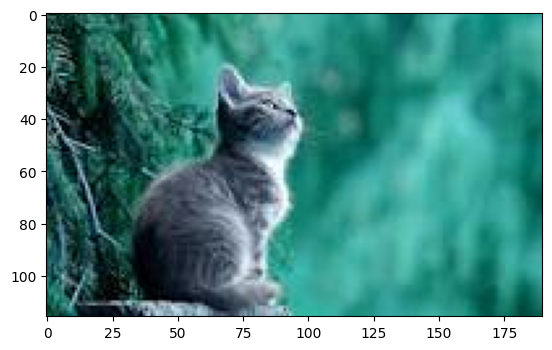

In [26]:
plt.imshow(test_img)

In [28]:
test_img.shape

(116, 190, 3)

In [29]:
test_img = cv2.resize(test_img,(256,256))

In [30]:
test_input = test_img.reshape((1,256,256,3))

In [31]:
model.predict(test_input)

1/1 [==============================] - 0s 267ms/step


array([[0.]], dtype=float32)

In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def predict_cat_or_dog(image_path):
    # Load the image
    test_img = cv2.imread(image_path)
    
    # Display the image
    plt.imshow(test_img)
    plt.axis('off')
    plt.show()
    
    # Resize the image
    test_img = cv2.resize(test_img, (256, 256))
    
    # Reshape the image for model input
    test_input = test_img.reshape((1, 256, 256, 3))
    
    # Normalize the image
    test_input = test_input / 255.0
    
    # Make the prediction
    prediction = model.predict(test_input)
    
    # Interpret the prediction
    if prediction[0][0] > 0.5:
        result = "Cat"
    else:
        result = "Dog"
    
    return result


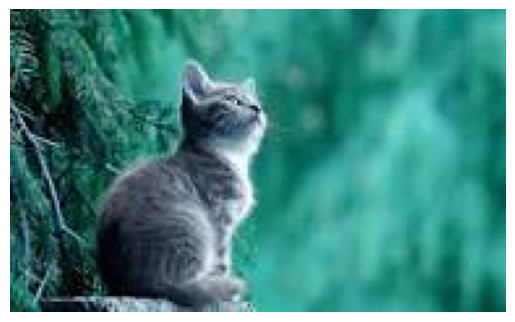

1/1 [==============================] - 0s 38ms/step


'Cat'

In [39]:
predict_cat_or_dog(img)

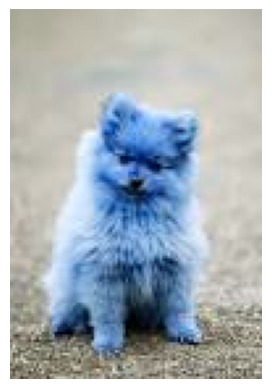

1/1 [==============================] - 0s 19ms/step
The image is: Dog


In [40]:
image_path = '/content/Dog.jpg'
prediction = predict_cat_or_dog(image_path)
print("The image is:", prediction)


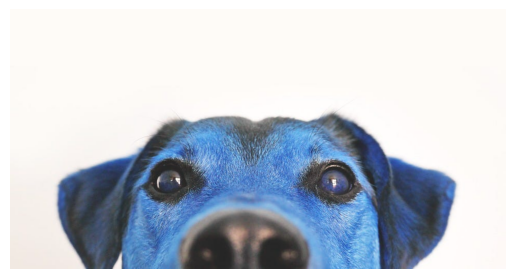

1/1 [==============================] - 0s 20ms/step
The image is: Dog


In [41]:
image_path = '/content/Dog2.jpg'
prediction = predict_cat_or_dog(image_path)
print("The image is:", prediction)